```{currentmodule} optimap
```

In [1]:
# Code snippet for rendering animations in the docs
from IPython.display import HTML
import warnings
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

def render_ani_func(f):
    om.utils.disable_interactive_backend_switching()
    plt.switch_backend('Agg')
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ani = f()
    %matplotlib inline
    om.utils.enable_interactive_backend_switching()

    vid = HTML(ani.to_html5_video())
    plt.close('all')
    return vid

```{tip}
Download this tutorial as a {download}`Jupyter notebook <converted/plotting.ipynb>`, or a {download}`python script <converted/plotting.py>` with code cells. We highly recommend using [Visual Studio Code](#vscode) to execute this tutorial.
```

# Tutorial 3: Masking / Segmentation

This tutorial explains how to select a region of interest in a video using ``optimap``. For instance, it is possible to use ``optimap`` to automatically select the heart surface, to manually draw a region of interest in the video image, or to ignore parts of the video close to the boundary. The post-processing can then be applied to  the masked or segmented part of the video image, for instance. ``optimap`` provides several easy-to-use routines for these purposes.

We will first load an example video file using the following code (done automatically):

In [2]:
import optimap as om
import numpy as np

filepath = om.utils.retrieve_example_data('Example_02_VF_Rabbit_Di-4-ANEPPS_Basler_acA720-520um_warped.npy', silent=True)
video_warped = om.load_video(filepath, use_mmap=True)[:100]

In [ ]:
# Hidden, same as above but shorten the video slightly

import optimap as om
import numpy as np

filepath = om.utils.retrieve_example_data('Example_02_VF_Rabbit_Di-4-ANEPPS_Basler_acA720-520um_warped.npy', silent=True)
video_warped = om.load_video(filepath, use_mmap=True)[:100]

## Automatic Background Segmentation

We can then use ``optimap``'s  {func}`background_mask` function to automatically separate much brighter tissue from the dark background:

Creating mask with detected threshold 401.0


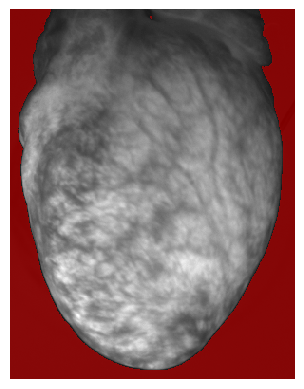

In [3]:
mask1 = om.background_mask(video_warped[0])

The {func}`background_mask` function creates a two-dimensional binary array with 1 (True) for tissue and 0 (False) for background. Note that the function sets all tissue to 1, i.e. it does not distinguish the ventricles from the atria. 

## Manual Segmentation using Drawing Tool

We can manually draw a mask and select a region using ``optimap``'s mask drawing tool:

In [4]:
mask2 = om.interactive_mask(video_warped[0])

The drawing tool can be used to draw one or several arbitrary regions and the tool automatically creates the corresponding binary array as a mask. Edits can be undone or redone, a drawn mask can be inverted, etc. (see Documentation):

.. image:: https://cardiacvision.ucsf.edu/sites/g/files/tkssra6821/f/optimap%20tutorials%20mask%201.png
:width: 400

.. image:: https://cardiacvision.ucsf.edu/sites/g/files/tkssra6821/f/optimap%20tutorials%20mask%202.png
:width: 400

## Combining several Masks

The masks `mask1` and `mask2` from above can be used to blank out parts of a video as follows:

In [ ]:
video_warped[:, mask1] = np.nan

```{warning}
This tutorial is currently under development. We will add more information soon.
```